In [1]:
# Is there a correlation between the number of deaths and rainfall due to wildfires? 
# Are the numbers of deaths caused by wildfires correlated with rainfall?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

In [3]:
# cal_fire_csv = "cal_fire.csv"
# cal_fire_csv.read_csv(r'cal_fire.csd', dtype="object", encoding="utf-8")

fire_csv = pd.read_csv("/Users/grizzlyjenkins/Personal Documents/WashU/yellow/Resources/final_df.csv")
fire_csv

fire_df = pd.DataFrame(fire_csv)
fire_df

,Unnamed: 0,Index,Fire Name,Cause,Acres,Structures,Deaths,County,Month,Year,Rainfall (in)
0,0,0,Mendocino Complex,Under Investigation,459123,280,1,Colusa,July,2018,0.00
1,1,1,Thomas,Powerlines,281893,1063,2,Ventura,December,2017,0.01
2,2,2,Cedar,Human Related,273246,2820,15,San Diego,October,2003,0.01
3,3,3,Rush,Lightning,271911,0,0,Lassen,August,2012,0.05
4,4,4,Rim,Human Related,257314,112,0,Tuolumne,August,2013,0.10
5,5,5,Zaca,Human Related,240207,1,0,Butte,November,2018,6.08
6,6,6,Carr,Human Related,229651,1614,8,Fresno,July,2015,0.56
7,7,7,Matilija,Undetermined,220000,0,0,Tulare,July,2002,0.01
8,8,8,Witch,Powerlines,197990,1650,2,Tuolumne,August,1987,0.03
9,9,9,Klamath Theater Complex,Lightning,192038,0,2,Trinity,August,1999,0.32


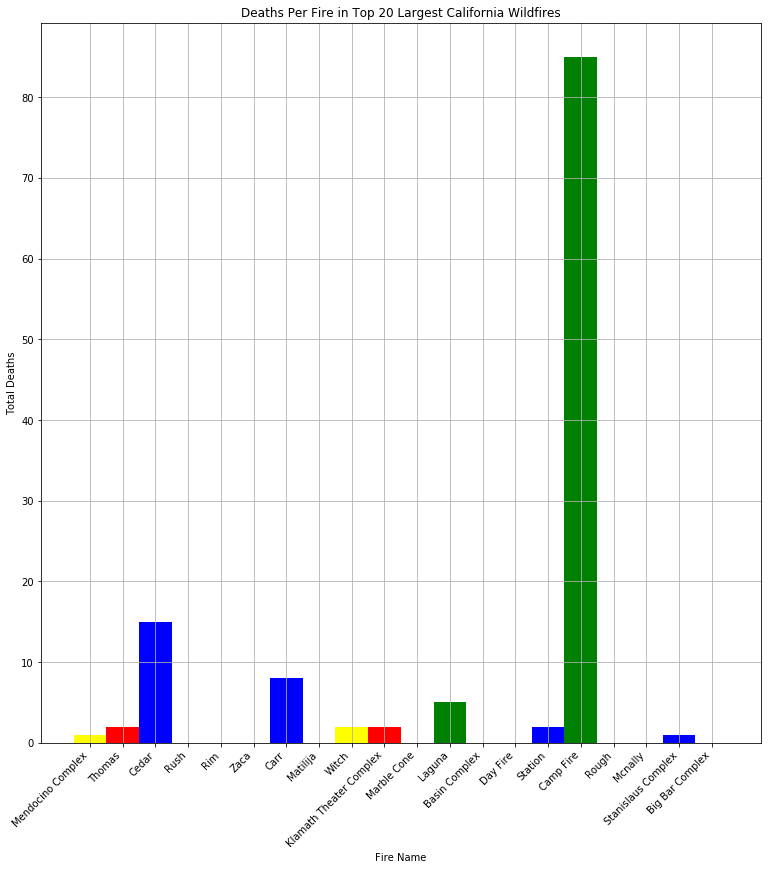

In [4]:
death_data = fire_df["Deaths"]
fire_data = fire_df["Fire Name"]
width = 1.0

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
plt.style.context('dark_background')
ax.bar(fire_data, death_data, width, color=['yellow', "red", "blue", "green"], align='center')
ax.grid(zorder=0)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Fire Name')
ax.set_ylabel('Total Deaths')
ax.set_title('Deaths Per Fire in Top 20 Largest California Wildfires')
plt.savefig('deaths_month_fire_bar')
plt.show()

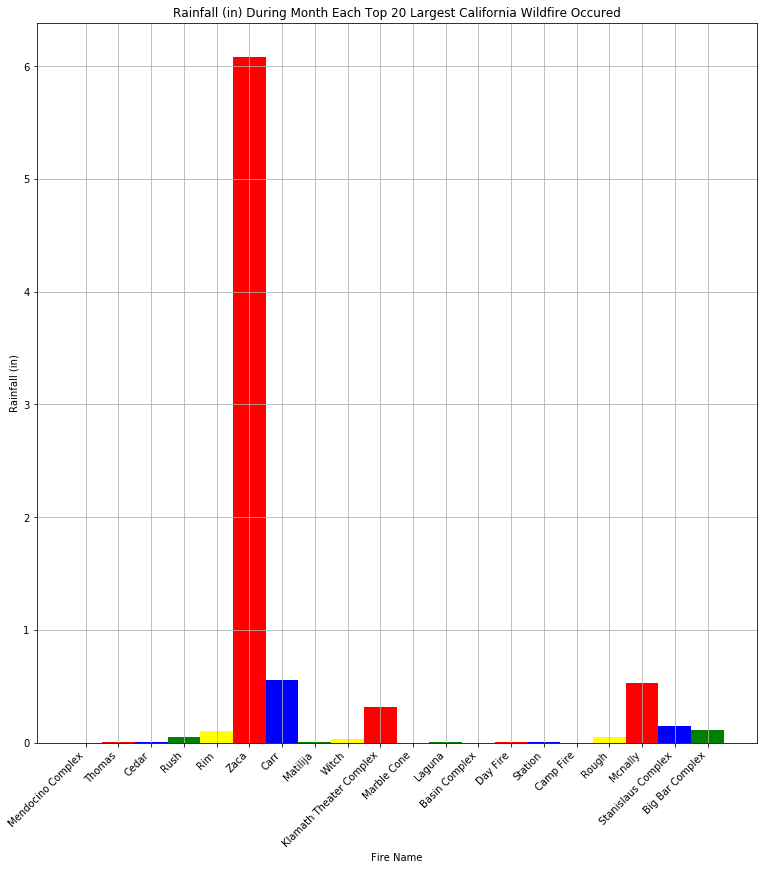

In [5]:
rainfall_data = fire_df["Rainfall (in)"]
fire_data = fire_df["Fire Name"]
width = 1.0


fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(fire_data, rainfall_data, width, color=['yellow', "red", "blue", "green"], align='center')
ax.grid(zorder=0)
plt.xticks(rotation=45, ha='right')
ax.titlesize : 24
ax.labelsize : 20
plt.xticks.labelsize : 30
plt.yticks.labelsize : 30
ax.set_xlabel('Fire Name')
ax.set_ylabel('Rainfall (in)')
ax.set_title('Rainfall (in) During Month Each Top 20 Largest California Wildfire Occured')
plt.savefig('rainfall_month_fire_bar')
plt.show()

R squared: 0.00820944012545549


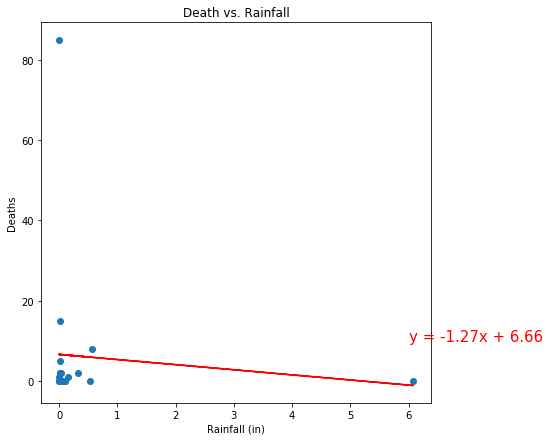

In [6]:
# Create linear regression showing correlation of rainfall and deaths for each wildfire, and exclude outliers
death_mean = round(fire_df['Deaths'].astype('float').mean(), 2)
death_median = round(fire_df['Deaths'].astype('float').median(), 2)
death_mode = round(fire_df['Deaths'].astype('float').mode(), 2)

rain_mean = round(fire_df['Rainfall (in)'].astype('float').mean(), 2)
rain_median = round(fire_df['Rainfall (in)'].astype('float').median(), 2)
rain_mode = round(fire_df['Rainfall (in)'].astype('float').mode(), 2)

x1_values = fire_df['Rainfall (in)'].astype('float')
y1_values = fire_df['Deaths'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x1_values,y1_values)

# Plot regression line
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Death vs. Rainfall')
plt.xlabel('Rainfall (in)')
plt.ylabel('Deaths')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save
plt.savefig('death_rain_1_linreg')

# Show plot
plt.show()

In [7]:
fire_df.head()

,Unnamed: 0,Index,Fire Name,Cause,Acres,Structures,Deaths,County,Month,Year,Rainfall (in)
0,0,0,Mendocino Complex,Under Investigation,459123,280,1,Colusa,July,2018,0.00
1,1,1,Thomas,Powerlines,281893,1063,2,Ventura,December,2017,0.01
2,2,2,Cedar,Human Related,273246,2820,15,San Diego,October,2003,0.01
3,3,3,Rush,Lightning,271911,0,0,Lassen,August,2012,0.05
4,4,4,Rim,Human Related,257314,112,0,Tuolumne,August,2013,0.10


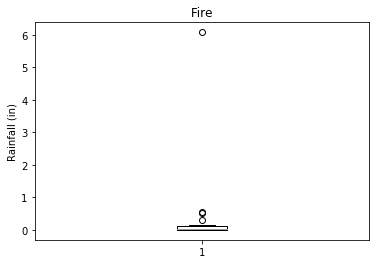

In [8]:
# Determine outlier and show plot of rainfall during month of each fire
quartiles = fire_df["Rainfall (in)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

rainfall = [0, 0.01, 0.01, 0.05, 0.1, 6.08, 0.56, 0.01, 0.03, 0.32, 0, 0.01, 0, 0.01, 0.01, 0, 0.05, 0.53, 0.15, 0.11]
fig1, ax1 = plt.subplots()
ax1.set_title('Fire')
ax1.set_ylabel('Rainfall (in)')
ax1.boxplot(rainfall)
plt.savefig('rainfall_outlier')
plt.show()

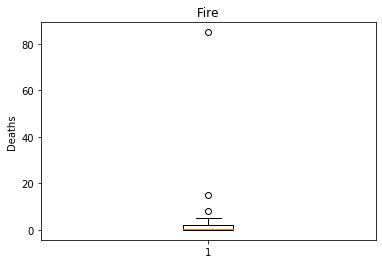

In [9]:
# Determine outlier and show plot of deaths per fire
quartiles = fire_df["Deaths"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

deaths = [1, 2, 15, 0, 0, 0, 8, 0, 2, 2, 0, 5, 0, 0, 2, 85, 0, 0, 1, 0]
fig1, ax1 = plt.subplots()
ax1.set_title('Fire')
ax1.set_ylabel('Deaths')
ax1.boxplot(deaths)
plt.savefig('death_outlier')
plt.show()

In [10]:
# Create dataframe with an index to enabling the dropping of outlier rows
index_fire_df = fire_df.set_index('Fire Name')
index_fire_df

,Unnamed: 0,Index,Cause,Acres,Structures,Deaths,County,Month,Year,Rainfall (in)
Fire Name,,,,,,,,,,
Mendocino Complex,0,0,Under Investigation,459123,280,1,Colusa,July,2018,0.00
Thomas,1,1,Powerlines,281893,1063,2,Ventura,December,2017,0.01
Cedar,2,2,Human Related,273246,2820,15,San Diego,October,2003,0.01
Rush,3,3,Lightning,271911,0,0,Lassen,August,2012,0.05
Rim,4,4,Human Related,257314,112,0,Tuolumne,August,2013,0.10
Zaca,5,5,Human Related,240207,1,0,Butte,November,2018,6.08
Carr,6,6,Human Related,229651,1614,8,Fresno,July,2015,0.56
Matilija,7,7,Undetermined,220000,0,0,Tulare,July,2002,0.01
Witch,8,8,Powerlines,197990,1650,2,Tuolumne,August,1987,0.03


In [11]:
# Drop outlier rows
drop_outliers = index_fire_df.drop("Zaca")
drop_outliers = drop_outliers.drop("Camp Fire")
drop_outliers

,Unnamed: 0,Index,Cause,Acres,Structures,Deaths,County,Month,Year,Rainfall (in)
Fire Name,,,,,,,,,,
Mendocino Complex,0,0,Under Investigation,459123,280,1,Colusa,July,2018,0.00
Thomas,1,1,Powerlines,281893,1063,2,Ventura,December,2017,0.01
Cedar,2,2,Human Related,273246,2820,15,San Diego,October,2003,0.01
Rush,3,3,Lightning,271911,0,0,Lassen,August,2012,0.05
Rim,4,4,Human Related,257314,112,0,Tuolumne,August,2013,0.10
Carr,6,6,Human Related,229651,1614,8,Fresno,July,2015,0.56
Matilija,7,7,Undetermined,220000,0,0,Tulare,July,2002,0.01
Witch,8,8,Powerlines,197990,1650,2,Tuolumne,August,1987,0.03
Klamath Theater Complex,9,9,Lightning,192038,0,2,Trinity,August,1999,0.32


R squared: 0.015240264992158624


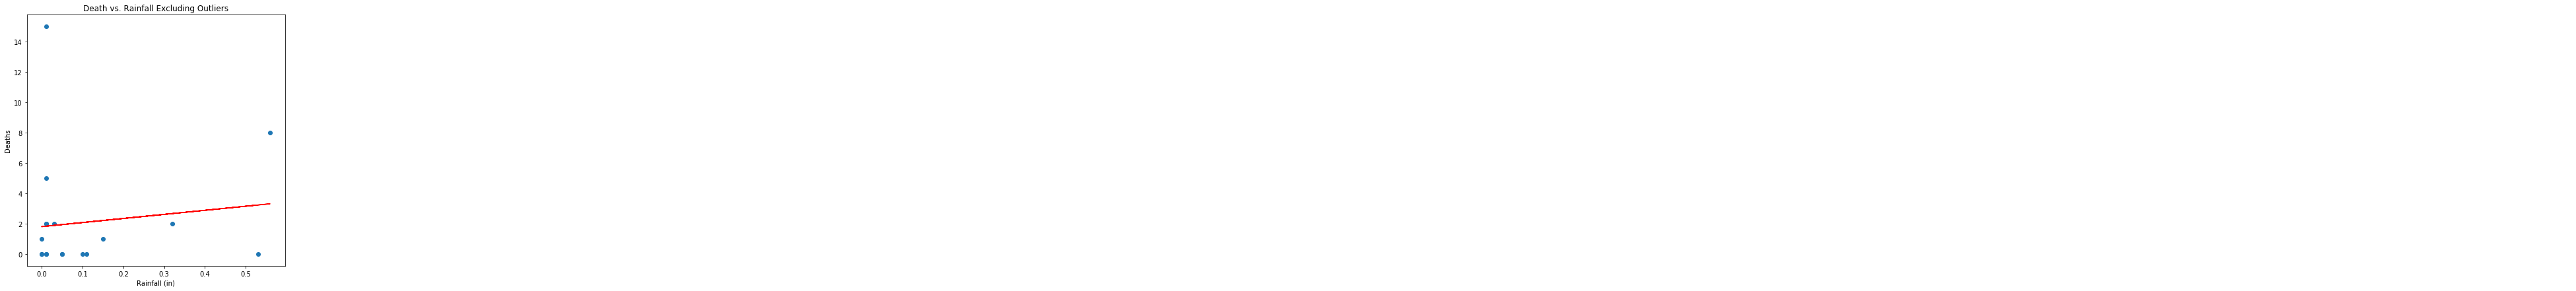

In [12]:
# Create linear regression showing correlation of rainfall and deaths for each wildfire, and exclude outliers
death_mean2 = round(drop_outliers['Deaths'].astype('float').mean(), 2)
death_median2 = round(drop_outliers['Deaths'].astype('float').median(), 2)
death_mode2 = round(drop_outliers['Deaths'].astype('float').mode(), 2)

rain_mean2 = round(drop_outliers['Rainfall (in)'].astype('float').mean(), 2)
rain_median2 = round(drop_outliers['Rainfall (in)'].astype('float').median(), 2)
rain_mode2 = round(drop_outliers['Rainfall (in)'].astype('float').mode(), 2)

x2_values = drop_outliers['Rainfall (in)'].astype('float')
y2_values = drop_outliers['Deaths'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values2 = x2_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x2_values,y2_values)

# Plot regression line
plt.plot(x2_values,regress_values2,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Death vs. Rainfall Excluding Outliers')
plt.xlabel('Rainfall (in)')
plt.ylabel('Deaths')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save
plt.savefig('death_rain_2_linreg')

# Show plot
plt.show()